In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

### Урок 5. Домашняя работа

Есть два набора точек - *x_hw* и *y_hw*. В рамках домашней работы нужно
* визуализировать набор точек
* найти коэффициенты регрессии $w_0, w_1$ по шагам, как в уроке
* посчитать предсказание в виде $\hat{y} = w_0 + w_1x$ и визуализировать его вместе с точками *x_hw* и *y_hw*

In [2]:
x_hw = [50, 60, 70, 100]
y_hw = [10, 15, 40, 45]

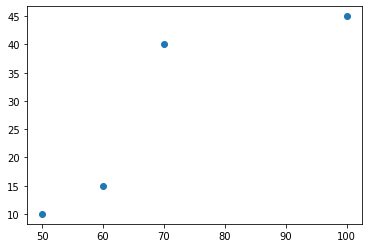

In [3]:
plt.scatter(x=x_hw, y=y_hw);

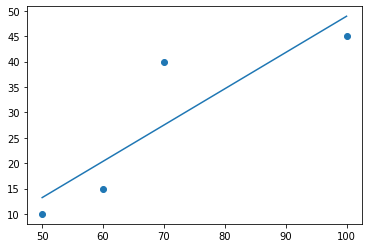

In [4]:
X = np.array([[x, 1] for x in x_hw])
Y = np.array([[y] for y in y_hw])

# Calculating weights as ((X.t * X) ** -1 * X.t) * Y
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

plt.plot(X[:, 0], X.dot(w))
plt.scatter(x=x_hw, y=y_hw);

### Урок 7. Домашняя работа

У вас есть два набора точек – истинные значения *y_true* и предсказанные значения *y_pred*

* для каждой точки из *y_true* постройте величину ошибки $e = y-\hat{y}$ – это называется **остатки регрессии**
* возведите ошибки в квадрат $e^2$
* постройте график ошибок – зависимость $e^2$ от $e$

In [5]:
import numpy as np

y_pred_ = np.array([30.0, 25.03, 30.57, 28.61, 27.94, 25.26, 23.0, 19.54, 11.52, 18.92, 19.0, 21.59, 20.91, 19.55, 19.28, 19.3, 20.53, 16.91, 16.18, 18.41, 12.52, 17.67, 15.83, 13.81, 15.68, 13.39, 15.46, 14.71, 19.55, 20.88, 11.46, 18.06, 8.81, 14.28, 13.71, 23.81, 22.34, 23.11, 22.92, 31.36])
y_true_ = np.array([24.0, 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15.0, 18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6, 15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21.0, 12.7, 14.5, 13.2, 13.1, 13.5, 18.9, 20.0, 21.0, 24.7, 30.8])

График должен получится вот такой:

![experiment_errors](https://sun9-50.userapi.com/c856120/v856120638/1e9be0/3m-6-p2kZfk.jpg)

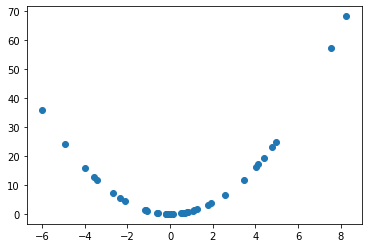

In [16]:
e = y_true_ - y_pred_
plt.plot(e, e ** 2, "o");

### Урок 9. Домашняя работа

Даны точки $x$ и значения в этих точках $y$. Нормализуйте $y$ с помощью *z-score* и постройте график зависимости нормализованных значений от $x$. Для графика используйте `.scatter(x,y_tansformed)`

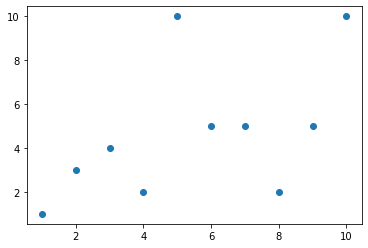

In [17]:
x = np.linspace(1,10,num=10)
y = np.array(
    [1.,  3.,  4.,  2., 10.,  5.,  5.,  2.,  5., 10.],
    dtype=np.float32
)

# -- ВАШ КОД ТУТ --
plt.scatter(x, y);

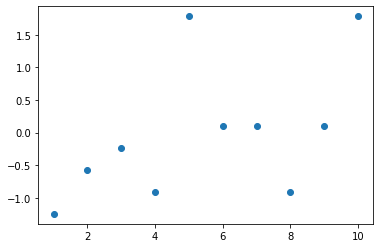

In [18]:
plt.scatter(x, StandardScaler().fit_transform(y.reshape(-1, 1)));

### Урок 11. Домашняя работа

**Задание простого уровня** Мы говорили, что метрики качества нужны, чтобы сравнивать различные модели между собой. В задаче полиномиальной регрессии реализуйте код для выбора лучшей степени полинома:

* возьмите все степени от 1 до 10 по порядку, без пропусков.
* найдите степень полинома, где будет лучший r2-score
* напишите код, который выводит самую подходящую степень полинома и соответствующий ей скор

Эта процедура называется Grid Search и помогает найти лучшие параметры для модели.

Обучите лучшую модель и сделайте predict

In [9]:
data = pd.read_csv("3.10_non_linear.csv")
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


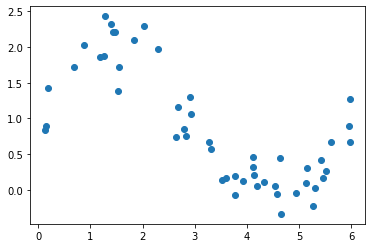

In [10]:
plt.scatter(data.x_train, data.y_train);

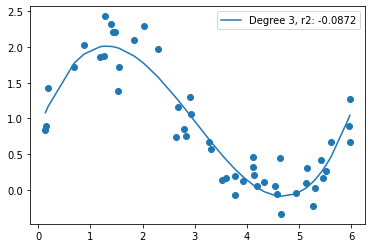

In [11]:
pipe = make_pipeline(
    FunctionTransformer(lambda x: np.array(x).reshape(-1, 1)),
    PolynomialFeatures(include_bias=False),
    LinearRegression()
)

param_grid = {
    "polynomialfeatures__degree": list(range(1, 11)),
}

model = GridSearchCV(pipe, param_grid, scoring="r2")
model.fit(data.x_train, data.y_train)

degree = model.best_params_["polynomialfeatures__degree"]
score = model.best_score_

plt.scatter(data.x_train, data.y_train)
plt.plot(data.x_train, model.predict(data.x_train), label=f"Degree {degree}, r2: {score:0.4f}")
plt.legend();

**Задание среднего уровня** Напишите класс для обучения модели, который содержит:

* функцию `.fit(X, y)` , которая принимает на вход массив фичей `X`, массив таргетов `y` и обучает коэффициенты регрессии. Код для обучения взять из первого урока модуля *Постановка ML задачи линейной регрессии*
* функцию `.predict(X)`, которая по массиву фичей `X` возвращает массив предсказаний `y`

Нужно использовать код для аналитически вычисляемых коэффициентов. 

Это задание позволит понять, как работает линейная регрессия "внутри" библиотечной реализации.

In [12]:
class CustomLinearReg:
    w: np.ndarray
    
    def fit(self, X, y):
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        self.w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, X):
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        return X.dot(self.w)

    @property
    def coef_(self) -> np.ndarray:
        return self.w[:-1]

    @property
    def intercept_(self) -> float:
        return w[-1]

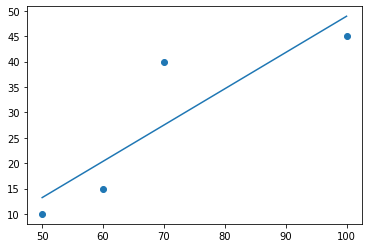

In [13]:
X = np.array(x_hw).reshape(-1, 1)
Y = np.array(y_hw).reshape(-1, 1)

model = CustomLinearReg()
model.fit(X, Y)

plt.scatter(x_hw, y_hw)
plt.plot(X, model.predict(X));

**Задание высокого уровня**

1. разделите датасет с домами Бостона из Урока 2 (таргет и фичи) на две части: в одной части 80% датасета (назовём train) в другой 20% (назовём valid) с помощью функции `train_test_split` из библиотеки `sklearn`
1. обучите модель только на train датасете
1. постройте предсказания valid датасете
1. Посчитайте  `r2 score` на валидационном сете

После этого примените к обеим датасетам z-преобразование и повторите шаги 2-4. Как изменилась метрика r2?

Это задание поможет понять, как валидировать линейную регрессию (и другие модели) на отложенной выборке.

In [14]:
boston = datasets.load_boston(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(*boston, test_size=0.2)

model1 = LinearRegression().fit(x_train, y_train)
model2 = make_pipeline(StandardScaler(), LinearRegression()).fit(x_train, y_train)

print("r2 score,   no scaling", r2_score(y_test, model1.predict(x_test)))
print("r2 score, with scaling", r2_score(y_test, model2.predict(x_test)))

r2 score,   no scaling 0.6762003776555154
r2 score, with scaling 0.676200377655516
